### Load data

In [1]:
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data
Y = dataset.target

### Split data

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

### Gaussian Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

In [16]:
import numpy as np

GNB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
y_predicted = GNB.predict(X_test)

#test the accuracy
accuracy = np.mean(y_test == y_predicted) *100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 94.7%


### Multi-layer Perceptron

In [18]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier()
MLP.fit(X_train, y_train)

/home/stanley/miniconda3/envs/rebound_venv/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [19]:
import numpy as np

y_predicted = MLP.predict(X_test)

#test the accuracy
accuracy = np.mean(y_test == y_predicted) *100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 92.1%


## 22.3 Cross Vaildation

In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(GNB, X, Y, scoring = 'accuracy')
average_accuracy = np.mean(scores)*100
print("The accuracy is {0:.1f}%".format(average_accuracy))

The accuracy is 93.4%


/home/stanley/miniconda3/envs/rebound_venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


## 22.4 Parameters
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [20]:
import warnings
warnings.filterwarnings('ignore')

avg_scores = []
all_scores = []
parameters = list(range(1,20))
for n_neighbors in parameters:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

NameError: name 'KNeighborsClassifier' is not defined

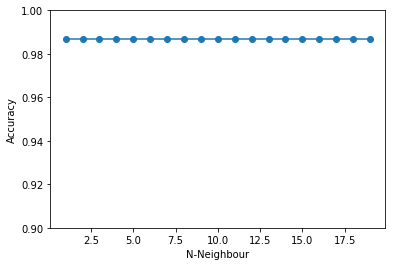

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(parameters, avg_scores, '-o')
plt.xlabel('N-Neighbour')
plt.ylabel('Accuracy')
plt.ylim([0.9,1.0])

plt.show()